In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp
import pandas as pd
from sklearn import datasets
from numpy import linalg as LA
from sklearn.metrics.pairwise import pairwise_distances
import sys
from sklearn import linear_model
import math

In [81]:
def neural_network(x,y,alpha,no_of_HL,no_of_units_HL):
    total_no_of_layers = no_of_HL + 2
    all_activation = {}
    
    cost_series = []
    activation = x  
    bais = np.array([1])      #creating the bais value
    activation = np.append(bais,activation)
    activation = (activation[np.newaxis]).T 
    all_activation[1] = activation
    all_theta = {}
    delta = {}
    BIG_DELTA = {}
    theta_history = []
    
    for k in range(1,total_no_of_layers):
         #calculating the size theta_matrix
        sj = activation.size-1
        sj_1 = no_of_units_HL[k-1]
        theta_size = sj_1 * (sj+1)
        theta = np.random.uniform(0,1,theta_size)
        theta = theta.reshape(sj_1,(sj+1))
        all_theta[k] = theta
        
    theta_history.append(all_theta.copy())
    
    for a in range(1,400):
        #Forward Propogation
        for k in range(1,total_no_of_layers):
            z = np.matmul(all_theta[k],all_activation[k])  #z = h_theta_of_x i.e. theta*x
            activation = sigmoid(z)
            bais = np.array([1])      #creating the bais value
            activation = np.append(bais,activation)
            activation = (activation[np.newaxis]).T       #converting activation into column matrix
            all_activation[k+1] = activation

        #back propogation

        #calculating delta for last layer
        delta[total_no_of_layers] = all_activation[total_no_of_layers][1:3,:] - y.T

        #calculating delta for other layers (lowest delta possible is 2)
        for l in range(total_no_of_layers-1, 1, -1):
            delta[l] = np.multiply(np.matmul(all_theta[l].T,delta[l+1]),(all_activation[l]*(1-all_activation[l])))
            delta[l] = delta[l][1:3,:]

         #cost in this iteration
        cost = np.sum(delta[total_no_of_layers]**2)/2
        cost_series.append(cost)

        #calculating BIG_delta - theta gradient  (it represents the direction of slope)
        for l in range(total_no_of_layers-1, 0, -1):
            tri_delta = np.matmul(delta[l+1],all_activation[l].T)
            BIG_DELTA[l] = tri_delta
            
        for l in range(total_no_of_layers-1, 0, -1):
            all_theta[l] = all_theta[l] - (alpha * BIG_DELTA[l])
        
        theta_history.append(all_theta.copy())
        
        print(all_activation[total_no_of_layers])
    
    return cost_series,theta_history
    
def sigmoid (x):
    return 1/(1 + np.exp(-x))

In [26]:
data = iris_raw.data
y = iris_raw.target

In [27]:
for k in range(1,3):
    print(k)

1
2


In [267]:
def artificial_neural_network(x,y,alpha,no_of_HL,no_of_units_HL):
    total_no_of_layers = no_of_HL + 2
    all_activation = {}
    BIG_DELTA = init()
    cost_series = []
    all_theta = {}
    delta = {}
    j_local = 0
    theta_gradient = {}
    
    #initialising theta
    all_theta = initialise_theta(x,no_of_units_HL,total_no_of_layers)
    
    
    for skip in range(0,100):
        x_test = x[skip]
        x_train = np.delete(x, (skip), axis=0)
        y_test = y[skip]
        y_train = np.delete(y, (skip), axis=0)
        for iteration in range(0,100):    
            # initialising big delta matrix
            BIG_DELTA = init()
        
            for itr in range(0,99):
                #forward propogate
                all_activation = calculate_all_activation(x_train[itr],all_theta,3)

                #calculate error in each layer
                delta = calcualte_delta(3,all_activation,y_train[itr],all_theta)

                #Cost function
                a3 = np.asscalar((all_activation[total_no_of_layers])[1,:])
                j_local = j_local + (y_train[itr]*math.log10(a3) + ((1-y_train[itr])*math.log10(1-a3)))

                #calculating BIG_delta -> theta gradient  (it represents the direction of slope)
                for l in range(total_no_of_layers-1, 0, -1):
                    tri_delta = np.matmul(delta[l+1],all_activation[l].T)
                    BIG_DELTA[l] = BIG_DELTA[l] + tri_delta
            
            for l in range(total_no_of_layers-1, 0, -1):
                theta_gradient[l] = BIG_DELTA[l]/99
            
            #Computing theta by subtracting theta gradient
            for l in range(total_no_of_layers-1, 0, -1):
                all_theta[l] = all_theta[l] - (alpha * theta_gradient[l])

            #appending the cost to cost_series
            cost_series.append(-(j_local/99))
            j_local = 0
        
    op = []
    for sample in range(0,100):
        all_activation = calculate_all_activation(x[sample],all_theta,3)
        if(all_activation[3][1,:]>=0.5):
            op.append(1)
        else:
            op.append(0)
    return cost_series,op



In [269]:
def init():
    BIG_DELTA = {}
    BIG_DELTA[1] = np.zeros(6).reshape(2,3)
    BIG_DELTA[2] = np.zeros(3).reshape(1,3)
    return BIG_DELTA

def calculate_all_activation(x,all_theta,total_no_of_layers):
    all_activation = {}
    activation = x  
    bais = np.array([1])      #creating the bais value
    activation = np.append(bais,activation)
    activation = (activation[np.newaxis]).T 
    all_activation[1] = activation
    for k in range(1,total_no_of_layers):
        z = np.matmul(all_theta[k],all_activation[k])  #z = h_theta_of_x i.e. theta*x
        activation = sigmoid(z)
        bais = np.array([1])      #creating the bais value
        activation = np.append(bais,activation)
        activation = (activation[np.newaxis]).T       #converting activation into column matrix
        all_activation[k+1] = activation
    return all_activation

def calcualte_delta(total_no_of_layers,all_activation,y,all_theta):
    delta = {}
    #calculating delta for last layer
    delta[total_no_of_layers] = all_activation[total_no_of_layers][1,:] - y.T

    #calculating delta for other layers (lowest delta possible is 2)
    for l in range(total_no_of_layers-1, 1, -1):
        temp = np.array(np.matmul(all_theta[l].T,delta[l+1]))
        temp = (temp[np.newaxis]).T 
        delta[l] = np.multiply(temp,(all_activation[l]*(1-all_activation[l])))
        delta[l] = delta[l][1:3,:]
    return delta

def initialise_theta(x,no_of_units_HL,total_no_of_layers):
    all_theta = {}
    activation = x[1]  
    bais = np.array([1])      #creating the bais value
    activation = np.append(bais,activation)
    activation = (activation[np.newaxis]).T 
    for k in range(1,total_no_of_layers):
         #calculating the size theta_matrix
        sj = activation.size-1
        sj_1 = no_of_units_HL[k-1]
        theta_size = sj_1 * (sj+1)
        np.random.seed(25)
        theta = np.random.uniform(0,1,theta_size)
        theta = theta.reshape(sj_1,(sj+1))
        all_theta[k] = theta
    return all_theta

In [176]:
from sklearn import datasets
iris_raw = datasets.load_iris()
x = iris_raw.data[:,-2:][50:]
y = iris_raw.target[50:]

In [177]:
y[y==1] = 0
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [258]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [268]:
no_of_units_HL = np.array([2,1])
cost,op = artificial_neural_network(x,y,0.1,1,no_of_units_HL)

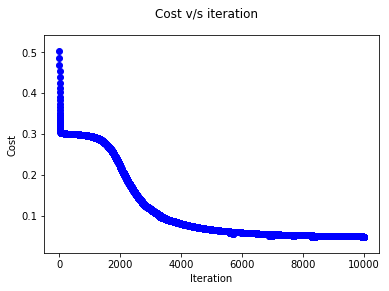

In [274]:
fig = plt.figure()
fig.suptitle('Cost v/s iteration')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.scatter(np.arange(0,10000),cost, c= 'b')

In [273]:
op

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [277]:
cost[10000-1]
cost[0]

0.50242791608459803

In [ ]:
x = np.array((0.05,0.1))
x

In [ ]:
for skip in range(1,100):
    print(skip)

In [76]:
x = np.array((0.05,0.1))
x = np.array([x])
x = x.T

In [78]:
x[1,:]

array([ 0.1])